In [1]:
import numpy as np
import h5py
import os, sys
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import yaml
import argparse
import scipy.optimize

sys.path.append('../')
import utils
import settings
plt.style.use('../spectrum.mplstyle')

In [2]:
#D200
#jackknife analysis
# data[rebin] = [value, error, chisqr]
# pidata = {
#     1:[0.06608,0.00019,2.51],
#     2:[0.06609,0.00022,2.14],
#     4:[0.06603,0.00027,1.82],
#     8:[0.06607,0.00030,1.72],
#     10:[0.06609,0.00032,1.75],
#     16:[0.06611,0.00034,1.85],
#     20:[0.06608,0.00033,1.96],
#     25:[0.06614,0.00032,1.78]
# }
# Ndata = {
#     1:[0.3149,0.0035],
#     2:[0.3151,0.0034],
#     4:[0.3152,0.0033],
#     8:[0.3148,0.0033],
#     10:[0.3145,0.0034],
#     16:[0.3137,0.0036],
#     20:[0.3149,0.0031],
#     25:[0.3144,0.0031],
# }
#bootstrap analysis Nb=500
# pidata_b500 = {
#     1:[0.06607,0.00023,2.49],
#     5:[0.06595,0.00029,1.77],
#     10:[0.06613,0.00038,1.72],
#     16:[0.06608,0.00036,1.85],
#     20:[0.06608,0.00042,2.10],
#     25:[0.06610,0.00036,1.81]
# }
# Ndata_b500 = {
#     1:[0.3155,0.0036],
#     5:[0.3155,0.0037],
#     10:[0.3141,0.0036],
#     16:[0.3135,0.0036],
#     20:[0.3152,0.0030],
#     25:[0.3156,0.0030],
# }
#bootstrap analysis Nb=Nbin
# pidata_bN = {
#     1:[0.06605,0.00020,2.46],
#     5:[0.06598,0.00029,1.75],
#     10:[0.06625,0.00038,1.88],
#     16:[0.06600,0.00029,2.33],
#     20:[0.06636,0.00028,2.09],
#     25:[0.06622,0.00038,1.76]
# }
# Ndata_bN = {
#     1:[0.3153,0.0036],
#     5:[0.3155,0.0037],
#     10:[0.3136,0.0033],
#     16:[0.3151,0.0029],
#     20:[0.3162,0.0031],
#     25:[0.3122,0.0040],
# }
#jackknife analysis
pidata = {
    1:[0.06608,0.00015,1.73],
    5:[0.06610,0.00020,1.29],
    10:[0.06610,0.00023,1.37],
    15:[0.06612,0.00023,1.31],
    20:[0.06605,0.00025,1.53],
    25:[0.06608,0.00026,1.49]
}
#bootstrap analysis Nb=800
pidata_b800 = {
    1:[0.06608,0.00016,1.64],
    5:[0.06611,0.00020,1.32],
    10:[0.06613,0.00023,1.38],
    15:[0.06617,0.00023,1.21],
    20:[0.06602,0.00025,1.52],
    25:[0.06606,0.00027,1.53]
}
all_pi_data = {
    "jackknife":pidata,
    "bootstrap":pidata_b800,
#     "bootstrap 2exp":pidata_b500
#     r"bootstrap $N_B=N_{\textup{bin}}$":pidata_bN
}
chosen_value = {"rebin":10,"dataset":"bootstrap"}
# all_N_data = {
#     "jackknife":Ndata,
#     r"bootstrap $N_B=500$":Ndata_b500,
# #     r"bootstrap $N_B=N_{\textup{bin}}$":Ndata_bN
# }

In [3]:
# N_rebin = {}
# N_vals = {}
pi_rebin = {}
pi_vals = {}
# for key in all_N_data.keys():
#     N_rebin[key] = np.array(list(all_N_data[key].keys()))
#     N_vals[key] = np.transpose(np.array(list(all_N_data[key].values())))
for key in all_pi_data.keys():
    pi_rebin[key] = np.array(list(all_pi_data[key].keys()))
    pi_vals[key] = np.transpose(np.array(list(all_pi_data[key].values())))

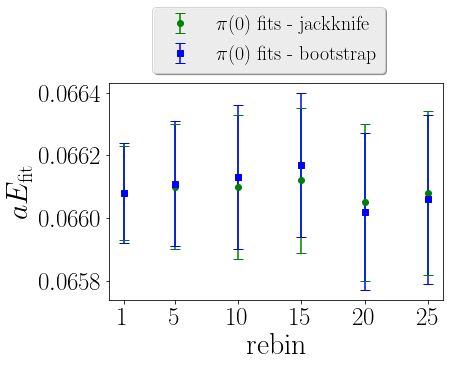

In [4]:
i=0
for dataset in pi_rebin.keys():
    plt.errorbar(x=pi_rebin[dataset],y=pi_vals[dataset][0],yerr=pi_vals[dataset][1],label=r'$\pi$(0) fits - '+dataset, linewidth=0.0, capsize=5, elinewidth=1.5,color=settings.colors[i], marker=settings.markers[i])
    i+=1
plt.xlabel("rebin")
plt.ylabel(r"$aE_{\textup{fit}}$")
plt.xticks(ticks=pi_rebin[r"bootstrap"])
plt.legend(bbox_to_anchor = (0.1, 1.0))

In [5]:
# for dataset in N_rebin.keys():
#     plt.errorbar(x=N_rebin[dataset],y=N_vals[dataset][0],yerr=N_vals[dataset][1],label=r'N(0) fits - '+dataset, linewidth=0.0, capsize=5, elinewidth=1.5,color=settings.colors[i], marker=settings.markers[i])
#     i+=1
# plt.xlabel("rebin")
# plt.ylabel(r"$aE_{\textup{fit}}$")
# plt.xticks(ticks=N_rebin[r"bootstrap $N_B=500$"])
# plt.legend(bbox_to_anchor = (0.1, 1.0))

In [6]:
# N_rel_err = {}
pi_rel_err = {}
# for key in all_N_data.keys():
#     N_rel_err[key] = N_vals[key][1]/N_vals[key][0]
for key in all_pi_data.keys():
    pi_rel_err[key] = pi_vals[key][1]/pi_vals[key][0]

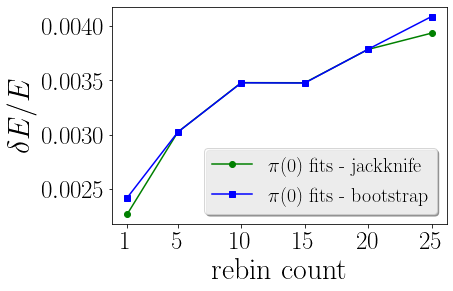

In [7]:
i=0
for dataset in pi_rebin.keys():
    plt.plot(pi_rebin[dataset],pi_rel_err[dataset],label=r'$\pi$(0) fits - '+dataset, color=settings.colors[i], marker=settings.markers[i])
    i+=1
plt.xlabel("rebin count")
plt.ylabel(r"$\delta E/E$")
plt.xticks(ticks=pi_rebin[r"bootstrap"])
plt.legend()
plt.savefig("rebin_analysis_pi-rel-err.pdf")

In [8]:
# for dataset in N_rebin.keys():
#     plt.plot(N_rebin[dataset],N_rel_err[dataset],label=r'N(0) fits - '+dataset, color=settings.colors[i], marker=settings.markers[i])
#     i+=1
# plt.xlabel("rebin")
# plt.ylabel(r"relative error")
# plt.xticks(ticks=pi_rebin[r"bootstrap $N_B=500$"])
# plt.legend(bbox_to_anchor = (0.1, 1.0))

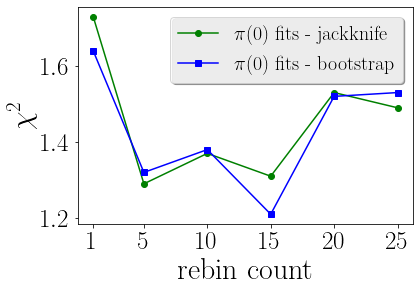

In [9]:
i=0
for dataset in pi_rebin.keys():
    plt.plot(pi_rebin[dataset],pi_vals[dataset][2],label=r'$\pi$(0) fits - '+dataset, color=settings.colors[i], marker=settings.markers[i])
    i+=1
plt.xlabel("rebin count")
plt.ylabel(r"$\chi^2$")
plt.xticks(ticks=pi_rebin[r"bootstrap"])
plt.legend()
plt.savefig("rebin_analysis_pi-chi.pdf")

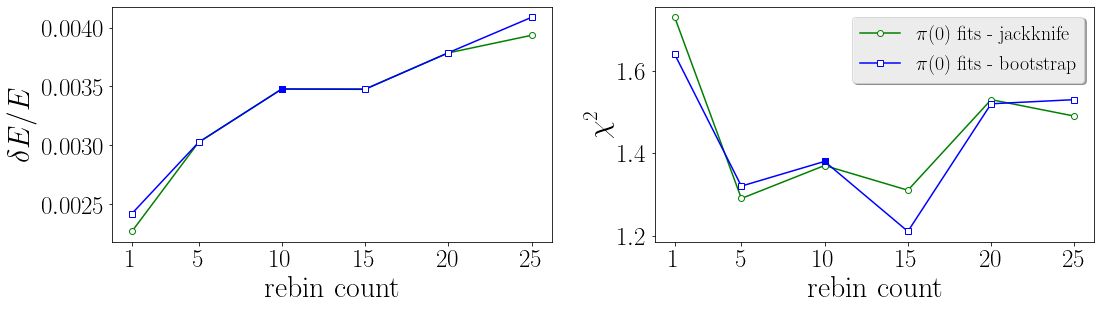

In [10]:
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(5)
plt.subplot(1, 2, 1)
i=0
for dataset in pi_rebin.keys():
    plt.plot(pi_rebin[dataset],pi_rel_err[dataset],label=r'$\pi$(0) fits - '+dataset, color=settings.colors[i], marker=settings.markers[i], mfc="white")
    if chosen_value["dataset"]==dataset:
        index = np.where( np.array(pi_rebin[dataset])==chosen_value["rebin"] )
        plt.plot([pi_rebin[dataset][index[0]]],[pi_rel_err[dataset][index[0]]], color=settings.colors[i], marker=settings.markers[i],lw=0)
    i+=1
plt.xlabel("rebin count")
plt.ylabel(r"$\delta E/E$")
plt.xticks(ticks=pi_rebin[r"bootstrap"])
# plt.legend()
plt.subplot(1, 2, 2)
i=0
for dataset in pi_rebin.keys():
    plt.plot(pi_rebin[dataset],pi_vals[dataset][2],label=r'$\pi$(0) fits - '+dataset, color=settings.colors[i], marker=settings.markers[i], mfc="white")
    if chosen_value["dataset"]==dataset:
        index = np.where( np.array(pi_rebin[dataset])==chosen_value["rebin"] )
        plt.plot([pi_rebin[dataset][index[0]]],[pi_vals[dataset][2][index[0]]], color=settings.colors[i], marker=settings.markers[i],lw=0)
    i+=1
    
# plt.margins(0,-0.1)
plt.xlabel("rebin count")
plt.ylabel(r"$\chi^2$")
plt.xticks(ticks=pi_rebin[r"bootstrap"])
plt.tight_layout()
plt.legend()
plt.savefig("rebin_analysis.pdf", bbox_inches='tight')

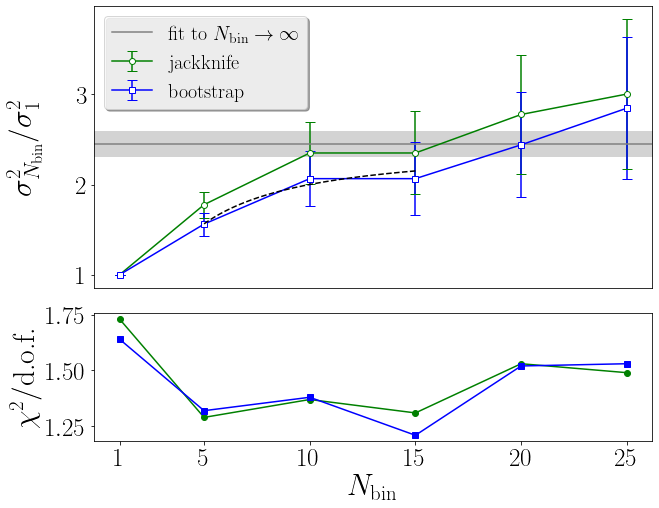

In [11]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(8)
plt.subplot(3, 1, (1,2))
i=0
# fitfunc = lambda x, a, b: 2.0*a*(1-b/x + b/x*np.exp(-x/a))  # function to fit
# dataset = "bootstrap"
# pars, corr = scipy.optimize.curve_fit(fitfunc, pi_rebin[dataset], pi_vals[dataset][1]*pi_vals[dataset][1]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0], [1.8, 1.7], pi_vals[dataset][1]*pi_vals[dataset][1]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0]*(2.0*np.sqrt(pi_rebin[dataset]/1000.0)+pi_rebin[dataset]/1000.0-2.0*np.sqrt(1.0/1000.0)-1.0/1000.0))
# a,b = pars
# plt.plot(pi_rebin[dataset],2.0*a*(1-b/pi_rebin[dataset] + b/pi_rebin[dataset]*np.exp(-pi_rebin[dataset]/a)))

for dataset in pi_rebin.keys():
#     plt.errorbar(x=pi_rebin[dataset],y=pi_vals[dataset][1],yerr=pi_vals[dataset][1]*np.sqrt(pi_rebin[dataset]/1000.0),label=dataset, color=settings.colors[i], marker=settings.markers[i])
    yvals = pi_vals[dataset][1]*pi_vals[dataset][1]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0]
    yerrs = pi_vals[dataset][1]*pi_vals[dataset][1]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0]*(2.0*np.sqrt(pi_rebin[dataset]/1000.0)+pi_rebin[dataset]/1000.0-2.0*np.sqrt(1.0/1000.0)-1.0/1000.0)
    plt.errorbar(x=pi_rebin[dataset],y=yvals,yerr=yerrs,label=dataset, color=settings.colors[i],elinewidth=1.5,capsize=5, marker=settings.markers[i], mfc="white")
    if chosen_value["dataset"]==dataset:
        index = np.where( np.array(pi_rebin[dataset])==chosen_value["rebin"] )
        plt.plot([pi_rebin[dataset][index[0]]],[yvals[index[0]]],color=settings.colors[i], marker=settings.markers[i],lw=0)
#     plt.errorbar(x=pi_rebin[dataset],y=pi_vals[dataset][1]*pi_vals[dataset][1]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0],yerr=pi_vals[dataset][1]*pi_vals[dataset][1]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0]*pi_rebin[dataset],label=dataset, color=settings.colors[i], marker=settings.markers[i])
    i+=1
# plt.xlabel("rebin count")
fitfunc = lambda x, a, b: 2.0*a*(1-b/x + b/x*np.exp(-x/a))  # function to fit
dataset = "bootstrap"
max_index = -2
pars, corr = scipy.optimize.curve_fit(fitfunc, pi_rebin[dataset][1:max_index], pi_vals[dataset][1][1:max_index]*pi_vals[dataset][1][1:max_index]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0], [1.8, 1.7], pi_vals[dataset][1][1:max_index]*pi_vals[dataset][1][1:max_index]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0]*(2.0*np.sqrt(pi_rebin[dataset][1:max_index]/1000.0)+pi_rebin[dataset][1:max_index]/1000.0-2.0*np.sqrt(1.0/1000.0)-1.0/1000.0))
perr = np.sqrt(np.diag(corr))
a,b = pars
x = np.linspace(pi_rebin[dataset][1],pi_rebin[dataset][max_index-1],num=1000)
plt.plot(x,2.0*a*(1-b/x + b/x*np.exp(-x/a)),color="black",zorder=10,ls="--")
#*pi_vals[dataset][1]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0]

plt.axhline(2*a,color="grey",label=r"fit to $N_{\textup{bin}} \to \infty$")
# plt.axhline(2*a+2*perr[0],color="black",ls="--")
# plt.axhline(2*a-2*perr[0],color="black",ls="--")
xrange = plt.xlim()
plt.fill_between(plt.xlim(),2*a-2*perr[0],2*a+2*perr[0],color="lightgrey")


plt.ylabel(r"$\sigma^2_{N_{\textup{bin}}}/\sigma^2_{1}$")
plt.xticks(ticks=[])
plt.xlim(xrange)

plt.legend()
plt.subplot(3, 1, 3)
i=0
for dataset in pi_rebin.keys():
    plt.plot(pi_rebin[dataset],pi_vals[dataset][2],label=dataset, color=settings.colors[i], marker=settings.markers[i])
    i+=1
    

plt.xlabel(r"$N_{\textup{bin}}$")
plt.ylabel(r"$\chi^2/\textup{d.o.f.}$")
plt.xticks(ticks=pi_rebin[r"bootstrap"])
# plt.tight_layout()
f.align_ylabels()

plt.xlim(xrange)
# plt.legend()
plt.savefig("rebin_analysis.pdf")

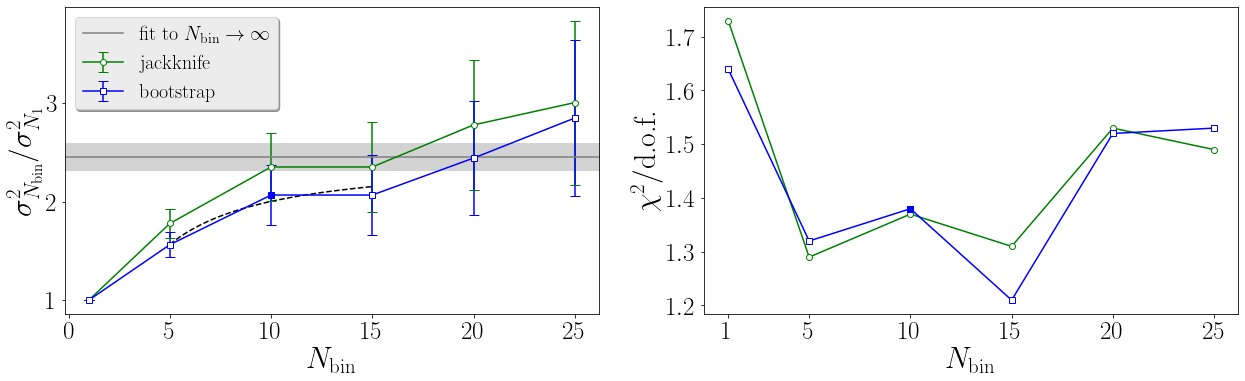

In [12]:
f = plt.figure()
f.set_figwidth(18)
f.set_figheight(6)
plt.subplot(1, 2, 1)
i=0
# fitfunc = lambda x, a, b: 2.0*a*(1-b/x + b/x*np.exp(-x/a))  # function to fit
# dataset = "bootstrap"
# pars, corr = scipy.optimize.curve_fit(fitfunc, pi_rebin[dataset], pi_vals[dataset][1]*pi_vals[dataset][1]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0], [1.8, 1.7], pi_vals[dataset][1]*pi_vals[dataset][1]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0]*(2.0*np.sqrt(pi_rebin[dataset]/1000.0)+pi_rebin[dataset]/1000.0-2.0*np.sqrt(1.0/1000.0)-1.0/1000.0))
# a,b = pars
# plt.plot(pi_rebin[dataset],2.0*a*(1-b/pi_rebin[dataset] + b/pi_rebin[dataset]*np.exp(-pi_rebin[dataset]/a)))

for dataset in pi_rebin.keys():
#     plt.errorbar(x=pi_rebin[dataset],y=pi_vals[dataset][1],yerr=pi_vals[dataset][1]*np.sqrt(pi_rebin[dataset]/1000.0),label=dataset, color=settings.colors[i], marker=settings.markers[i])
    yvals = pi_vals[dataset][1]*pi_vals[dataset][1]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0]
    yerrs = pi_vals[dataset][1]*pi_vals[dataset][1]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0]*(2.0*np.sqrt(pi_rebin[dataset]/1000.0)+pi_rebin[dataset]/1000.0-2.0*np.sqrt(1.0/1000.0)-1.0/1000.0)
    plt.errorbar(x=pi_rebin[dataset],y=yvals,yerr=yerrs,label=dataset, color=settings.colors[i],elinewidth=1.5,capsize=5, marker=settings.markers[i], mfc="white",zorder = 2)
    if chosen_value["dataset"]==dataset:
        index = np.where( np.array(pi_rebin[dataset])==chosen_value["rebin"] )
        plt.plot([pi_rebin[dataset][index[0][0]]],[yvals[index[0][0]]],color=settings.colors[i], marker=settings.markers[i],lw=0,zorder = 3)
    i+=1
# plt.xlabel("rebin count")

fitfunc = lambda x, a, b: 2.0*a*(1-b/x + b/x*np.exp(-x/a))  # function to fit
dataset = "bootstrap"
min_index = 1
max_index = -2
pars, corr = scipy.optimize.curve_fit(fitfunc, pi_rebin[dataset][min_index:max_index], pi_vals[dataset][1][min_index:max_index]*pi_vals[dataset][1][min_index:max_index]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0], [1.8, 1.7], pi_vals[dataset][1][min_index:max_index]*pi_vals[dataset][1][min_index:max_index]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0]*(2.0*np.sqrt(pi_rebin[dataset][min_index:max_index]/1000.0)+pi_rebin[dataset][min_index:max_index]/1000.0-2.0*np.sqrt(1.0/1000.0)-1.0/1000.0))
perr = np.sqrt(np.diag(corr))
a,b = pars
x = np.linspace(pi_rebin[dataset][min_index],pi_rebin[dataset][max_index-1],num=1000)
plt.plot(x,2.0*a*(1-b/x + b/x*np.exp(-x/a)),color="black",zorder=1,ls="--")
#*pi_vals[dataset][1]/pi_vals[dataset][1][0]/pi_vals[dataset][1][0]

plt.axhline(2*a,color="grey",label=r"fit to $N_{\textup{bin}} \to \infty$")
# plt.axhline(2*a+2*perr[0],color="black",ls="--")
# plt.axhline(2*a-2*perr[0],color="black",ls="--")
xrange = plt.xlim()
plt.fill_between(plt.xlim(),2*a-2*perr[0],2*a+2*perr[0],color="lightgrey",zorder=0)


plt.ylabel(r"$\sigma^2_{N_{\textup{bin}}}/\sigma^2_{N_{1}}$")
# plt.xticks(ticks=[])
plt.xlim(xrange)
plt.xlabel(r"$N_{\textup{bin}}$")

plt.legend()
plt.subplot(1, 2, 2)
i=0
for dataset in pi_rebin.keys():
    plt.plot(pi_rebin[dataset],pi_vals[dataset][2],label=dataset, color=settings.colors[i], marker=settings.markers[i], mfc="white")
    if chosen_value["dataset"]==dataset:
        index = np.where( np.array(pi_rebin[dataset])==chosen_value["rebin"] )
        plt.plot([pi_rebin[dataset][index[0]]],[pi_vals[dataset][2][index[0]]], color=settings.colors[i], marker=settings.markers[i],lw=0)
    i+=1
    

plt.xlabel(r"$N_{\textup{bin}}$")
plt.ylabel(r"$\chi^2/\textup{d.o.f.}$")
plt.xticks(ticks=pi_rebin[r"bootstrap"])
plt.tight_layout()
# f.align_ylabels()

plt.xlim(xrange)
# plt.legend()
plt.savefig("rebin_analysis2.pdf")